# Principal Component Analysis

Proposed by Pearson in 1901 and further developed by Hotelling in 1993.

## Objective

### Tasks

Given $X_1, X_2, \ldots, X_d$, we want to extract the most useful information of $p$ measurements such that

1. **explore underlying dimension** behind the $p$ original measurements to explain the variation of $p$ original measurements, which may have interesting or revealing interpretations, such as size, shape and contrasts in natural science;

2. **estimate latent variables** (i.e. variables that cannot be measured or observed.) which can explain the variation of the $p$ original measurements, especially in
social behavioral sciences.

3. **simplify the dimension** of the observed data set. Lower dimension can be chosen from the data set such that the variations of measurements can be captured with an acceptable level. For example, $k \ll d$ latent variables are chosen to capture 90% of variation of $p$ original measurements. Indeed, this can be regarded as the data reduction or dimension reduction.

### Formulation based on Distribution

Consider a $d$-dimensional random vector $\boldsymbol{x} = \left( X_1, X_2, \ldots, X_d \right)^\top$ with mean vector $\boldsymbol{\mu} = \left( \mu_1, \ldots, \mu_d \right)^\top$ and covariance matrix $\boldsymbol{\Sigma}$. PCA aims to obtain the variables $Z_1, Z_2, \ldots, Z_k$ which are the **linear combinations** of $X_1, X_2, \ldots, X_d$ and $k \le d$, such that

- The sum of the new individual variances

  $$
  \operatorname{Var}\left( Z_1 \right) + \operatorname{Var}\left( Z_2 \right) + \ldots + \operatorname{Var}\left( Z_k \right)
  $$

  is **close** to the sum of the original individual variances

  $$
  \operatorname{Var}\left( X_1 \right) + \operatorname{Var}\left( X_2 \right) + \ldots + \operatorname{Var}\left( X_d \right)
  $$

  and

- The linear combinations $Z_i$ and $Z_j$ are **uncorrelated** for $i\ne j$. This imply that each variable in $\boldsymbol{z} = \left( Z_1, Z_2, \ldots, Z_k \right)^\top$ can be analyzed by using **univariate** techniques.

The new variables $Z_j$ are called princial components.

### Formulation based on Data

Other formulations of PCA based on **centered** sample data matrix $\boldsymbol{X}$ aim to find a linear mapping $\mathbb{R} ^d \rightarrow \mathbb{R} ^k$ (assume $\boldsymbol{X}$ is centered) to project the data matrix $\boldsymbol{X}_{n \times d}$ to a lower dimensional embedding matrix $\boldsymbol{Z}_{n \times k}$.

$$\begin{aligned}
\boldsymbol{z}_i &= \boldsymbol{W}_{d \times k} ^\top \boldsymbol{x}_i \\
\boldsymbol{Z}_{n \times k} &= \boldsymbol{X}_{n \times d}  \boldsymbol{W} _{d \times k} \\
\end{aligned}$$

The mapping $\boldsymbol{W} _{d \times k}$ are also called **loadings**, and the embeddings $\boldsymbol{Z} _{n \times k}$ are called **scores**. The loadings can be used to visualize how the original variables $X_j$ contributes to each principal component $Z_j$. The scores $\boldsymbol{Z} _{n \times k}$ can then be used for downstream tasks, e.g. visualization, classification.

There are various equivalent formulations of optimization problems to find the loadings $\boldsymbol{W}$:

- Maximize the total variances $\sum_i \operatorname{Var}\left( Z_i \right)$ of the projected data $\boldsymbol{Z} =  \boldsymbol{X}  \boldsymbol{W}$ (similar to the population formulation above)

    $$\begin{align}
    \max_{\boldsymbol{W}}\, & \operatorname{tr}\left( \boldsymbol{Z} ^\top \boldsymbol{Z}  \right)   \\
     \text{s.t.}  & \ \boldsymbol{W} ^\top \boldsymbol{W} = \boldsymbol{I}  \\
       &\ \boldsymbol{W} \in \mathbb{R} ^{d \times k}
    \end{align}$$

- Minimize total reconstruction loss, where $\hat{\boldsymbol{x} }_i = \boldsymbol{W} \boldsymbol{z} _i = \boldsymbol{W} \boldsymbol{W} ^{\top} \boldsymbol{x} _i$

    $$\begin{align}
    \min_{\boldsymbol{W}}\, & \sum_i^n \left\Vert \boldsymbol{x}_i - \hat{\boldsymbol{x} }_i \right\Vert ^2    \\
    \text{s.t.}  & \boldsymbol{W} ^\top \boldsymbol{W} = \boldsymbol{I}  \\
       &\ \boldsymbol{W} \in \mathbb{R} ^{d \times k}
    \end{align}$$

- Low-dimensional Hyperplane fitting

  Fit a low-dimensional hyperplane such that, when we project our data $\boldsymbol{X}$ onto the hyperplane and obtain $\boldsymbol{Z}$, the variance of our data is changed as little as possible. The low-dimensional hyperplane is defined by $\boldsymbol{W}$, which is the matrix of basis vectors that span it. Minimizing the change in variance between the original data $\boldsymbol{X}$ and its reconstruction $\boldsymbol{Z} \boldsymbol{W}^{\top}$ is equivalent to minimizing the sum of squared error loss:

  $$\begin{align}
  \min_{\boldsymbol{W}, \left\{ \boldsymbol{z}_i \right\}}\, & \sum_i^n \left\Vert \boldsymbol{x}_i - \boldsymbol{W} \boldsymbol{z} _i \right\Vert ^2    \\
   \text{s.t.}  & \boldsymbol{W} ^\top \boldsymbol{W} = \boldsymbol{I}  \\
     &\ \boldsymbol{W} \in \mathbb{R} ^{d \times k}, \boldsymbol{z} _i \in \mathbb{R} ^{k}
  \end{align}$$

  :::{admonition,dropdown,seealso} *Derivation of Equivalentce*

  First, we write in matrix form

  $$
  \min_{\boldsymbol{W}, \left\{ \boldsymbol{z}_i \right\}}\, \sum_i^n \left\Vert \boldsymbol{x}_i - \boldsymbol{W} \boldsymbol{z} _i \right\Vert ^2
  = \min_{\boldsymbol{W}, \boldsymbol{Z}}\, \left\| \boldsymbol{X} - \boldsymbol{Z} \boldsymbol{W} ^{\top} \right\|^2 \\
  $$

  Setting first order derivative w.r.t. $\boldsymbol{Z}$ to 0 gives $\boldsymbol{Z} = \boldsymbol{X} \boldsymbol{W}$. Hence the objective is


  $$\begin{aligned}
  \min_{\boldsymbol{W}}\, \left\| \boldsymbol{X} - \boldsymbol{X}\boldsymbol{W} \boldsymbol{W} ^{\top} \right\|^2
  &= \min_{\boldsymbol{W}}\, \operatorname{tr} \left( (\boldsymbol{X} - \boldsymbol{X} \boldsymbol{W} \boldsymbol{W} ^{\top} ) ^{\top} (\boldsymbol{X} - \boldsymbol{X} \boldsymbol{W} \boldsymbol{W} ^{\top} ) \right) \\
  &= \min_{\boldsymbol{W}}\, \operatorname{tr}(\boldsymbol{X} ^{\top} \boldsymbol{X}  - \boldsymbol{X} ^{\top} \boldsymbol{X} \boldsymbol{W} \boldsymbol{W} ^{\top}  - \boldsymbol{W} \boldsymbol{W} ^{\top} \boldsymbol{X} ^{\top} \boldsymbol{X}  + \boldsymbol{W} \boldsymbol{W} ^{\top} \boldsymbol{X} ^{\top} \boldsymbol{X} \boldsymbol{W} \boldsymbol{W} ^{\top} ) \\
  &= \min_{\boldsymbol{W}}\, \operatorname{tr} \left( \boldsymbol{X} ^{\top} \boldsymbol{X}  - \boldsymbol{W} ^{\top} \boldsymbol{X} ^{\top} \boldsymbol{X} \boldsymbol{W}  \right)  \quad \because \text{by cyclic permutations in trace} \\
  &\Leftrightarrow   \min_{\boldsymbol{W}}\, \operatorname{tr} (\boldsymbol{W} ^{\top} \boldsymbol{X} ^{\top} \boldsymbol{X} \boldsymbol{W})\\
  &= \min_{\boldsymbol{W}}\, \operatorname{tr} (\boldsymbol{Z} ^{\top} \boldsymbol{Z})\\
  \end{aligned}$$

  :::

## Learning

(pca-sequential)=
### Sequential Maximization

The first variable in $\boldsymbol{z}$, i.e. $Z_1 = \boldsymbol{u} \boldsymbol{x}$ is obtained to maximize its variance, i.e.,

$$
\operatorname{Var}\left(Z_{1}\right)=\max _{\left\Vert \boldsymbol{u}  \right\Vert _2^2 = 1 } \boldsymbol{u}^{\top} \boldsymbol{\Sigma} \boldsymbol{u}
$$

where the constraint is to removes scaling or $\boldsymbol{u}$. Suppose the maximum is achieved at $\boldsymbol{u} = \boldsymbol{u} _1$ and we call the variable $Z_1$ given below the **first population principal component**

$$
Z_1 = \boldsymbol{u} _1^{\top} \boldsymbol{x}
$$

Successively for $k=2, \ldots, d$ the variance of $Z_i$ can be obtained by the following maximization

$$\begin{aligned}
\max _{\boldsymbol{u} _k} && \boldsymbol{u}_k^{\top} \boldsymbol{\Sigma} \boldsymbol{u}_k & \\
\mathrm{s.t.}
&& \quad \boldsymbol{u}_k^{\top} \boldsymbol{u}_k&=1 \\
&& \boldsymbol{u}_k ^{\top} \boldsymbol{u} _j &= 0  \text{  for }  j=1, \ldots, k-1 \\
\end{aligned}$$

where the second constraint $\boldsymbol{u}_k ^{\top} \boldsymbol{u} _j = 0$ comes from the identity

$$
\begin{aligned}
\operatorname{Cov}\left(Z_{k}, Z_{j}\right)  &=\operatorname{Cov}\left(\boldsymbol{u} _{k}^{\top} \boldsymbol{x}, \boldsymbol{u}_{j}^{\top} \boldsymbol{x}\right) \\
&=\boldsymbol{u}_{k}^{\top} \operatorname{Cov}(\boldsymbol{x}, \boldsymbol{x}) \boldsymbol{u}_{j} \\
&=\boldsymbol{u}_{k}^{\top} \boldsymbol{\Sigma} \boldsymbol{u}_{j} \\
&=\boldsymbol{u}_{k}^{\top} \lambda_{j} \boldsymbol{u}_{j} \\
&=\lambda_{j} \boldsymbol{u}_{k}^{\top} \boldsymbol{u}_{j}
\end{aligned}
$$

Since $\lambda_j > 0$ and we want uncorrelated principal components $\operatorname{Cov}\left(Z_k, Z_{j}\right) = 0$, we obtain $\boldsymbol{u} _k ^{\top} \boldsymbol{u} _j = 0$.

After we solve $\boldsymbol{u} _k$, the $k$-th population principal component is then

$$
Z_k = \boldsymbol{u} _k^\top \boldsymbol{x}
$$

:::{admonition,dropdown,seealso} Derivation

The problem to find $\boldsymbol{u} _1$ is an [Rayleigh quotient](rayleigh-quotient) problem which has been solved there. We show how to solve the subsequent $\boldsymbol{u} _k$ for $k \ge 2$.

When $k=2$, the problem is

$$\begin{aligned}
\max _{\boldsymbol{u} _2} && \boldsymbol{u}_2^{\top} \boldsymbol{\Sigma} \boldsymbol{u}_2 & \\
\mathrm{s.t.}
&& \quad \boldsymbol{u}_2^{\top} \boldsymbol{u}_2&=1 \\
&& \boldsymbol{u}_2 ^{\top} \boldsymbol{u} _1 &= 0\\
\end{aligned}$$

The Lagrangean is

$$
\mathcal{L}_{2}=\boldsymbol{u}_{2}^{\top} \Sigma \boldsymbol{u}_{2}-\lambda\left(\boldsymbol{u}_{2}^{\top} \boldsymbol{u}_{2}-1\right)-\delta\left(\boldsymbol{u}_{2}^{\top} \boldsymbol{u}_{1}-0\right)
$$

Taking derivative w.r.t. $\boldsymbol{u} _2$ gives

$$
\frac{\partial \mathcal{L}_{2}}{\partial \boldsymbol{u}_{2}}=2 \boldsymbol{\Sigma} \boldsymbol{u}_{2}-2 \lambda \boldsymbol{u}_{2}-\delta \boldsymbol{u}_{1}=0
$$

Left-multiply $\boldsymbol{u} _1 ^{\top}$ we have

$$
\begin{aligned}
RHS &= \boldsymbol{u}_{1}^{\top} \boldsymbol{0} =0 \\
LHS &=2\left(\boldsymbol{u}_{1}^{\top} \Sigma \boldsymbol{u}_{2}-\boldsymbol{u}_{1}^{\top} \lambda \boldsymbol{u}_{2}\right)-\boldsymbol{u}_{1}^{\top} \delta \boldsymbol{u}_{1} \\
&=2\left(\left(\boldsymbol{\Sigma} \boldsymbol{u}_{1}\right)^{\top} \boldsymbol{u}_{2}-\lambda \boldsymbol{u}_{1}^{\top} \boldsymbol{u}_{2}\right)-\delta \boldsymbol{u}_{1}^{\top} \boldsymbol{u}_{1} \\
&=2\left(\lambda \boldsymbol{u}_{1}^{\top} \boldsymbol{u}_{2}-\lambda \boldsymbol{u}_{1}^{\top} \boldsymbol{u}_{2}\right)-\delta \\
&=- \delta
\end{aligned}
$$

Hence $\delta = 0$. Substituting this back gives $\Sigma \boldsymbol{u} _2= \lambda\boldsymbol{u} _{2}$. Thus, $\boldsymbol{u} _2$ is an eigenvector of $\boldsymbol{\Sigma}$ with eigenvalue $\lambda$. The objective is then $\boldsymbol{u} _2 \boldsymbol{\Sigma} \boldsymbol{u} _2 = \lambda$. Hence, we choose $\lambda_2$, and choose $\boldsymbol{u} _2$ to be the eigenvector of $\boldsymbol{\Sigma}$ associated with $\lambda_2$.

For $k=3, \ldots, n$, the Lagrangean is


$$
\mathcal{L}_{k}=\boldsymbol{u}_{k}^{\top} \Sigma \boldsymbol{u}_{k}-\lambda\left(\boldsymbol{u}_{k}^{\top} \boldsymbol{u}_{k}-1\right)-\delta_{1}\left(\boldsymbol{u}_{k}^{\top} \boldsymbol{u}_{1}\right)-\cdots-\delta_{k-1}\left(\boldsymbol{u}_{k}^{\top} \boldsymbol{u}_{k-1}\right)
$$

Taking derivative gives

$$
\begin{aligned}
\frac{\partial L_{k}}{\partial \boldsymbol{u}_{k}} &=2(\Sigma-\lambda I) \boldsymbol{u}_{k}-\delta_{1} \boldsymbol{u}_{1}-\cdots-\delta_{k-1} \boldsymbol{u}_{k-1} \\
&=2 \boldsymbol{\Sigma} \boldsymbol{u}_{k}-2 \lambda \boldsymbol{u}_{k}-\delta_{1} \boldsymbol{u}_{1}-\cdots-\delta_{k-1} \boldsymbol{u}_{k-1} \\
&=0
\end{aligned}
$$

Similarly, left multiplying $\boldsymbol{u} _j ^{\top}$ gives $\delta_j=0$ for $j=1, \ldots, k-1$. Substituting $\delta_j=0$ back gives $\boldsymbol{\Sigma} \boldsymbol{u} _k = \lambda \boldsymbol{u} _k$. We can then choose the $k$-th largest eigenvalue $\lambda_k$ and the associated eigenvector to be $\boldsymbol{u}_k$.

:::

### Spectral Decomposition

Rather than obtaining the principal components sequentially, the principal components and their variances can be obtained simultaneously by solving for the eigenvectors and eigenvalues of $\boldsymbol{\Sigma}$. Its [spectral decomposition](eigen-decomposition) is,

$$
\boldsymbol{\Sigma}  = \boldsymbol{U} \boldsymbol{\Lambda} \boldsymbol{U} ^\top = \sum_i^d \lambda_i \boldsymbol{u} _i \boldsymbol{u} _i ^\top
$$

where
- $\lambda_1 > \lambda_2 > \dots> \lambda_d \ge 0$ are ordered eigenvalues of $\boldsymbol{\Sigma}$: $\boldsymbol{\Lambda} =  \operatorname{diag}(\lambda_1, \lambda_2, \ldots, \lambda_d)$
- $\boldsymbol{u} _1, \ldots, \boldsymbol{u} _d$ are their corresponding normalized eigenvectors forming the column vectors of the orthogonal matrix $\boldsymbol{U} = \left( \boldsymbol{u} _1\  \boldsymbol{u} _2 \ \ldots \  \boldsymbol{u} _d \right)$, where $\boldsymbol{U}  ^\top \boldsymbol{U}   = \boldsymbol{I}$ or $\boldsymbol{u} _i ^\top \boldsymbol{u} _j = 1$ if $i=j$ and 0 otherwise.

For derivation see [1](https://math.stackexchange.com/questions/3736092/how-to-solve-the-optimization-problem-of-pca?rq=1),[2](https://math.stackexchange.com/questions/1902421/prove-that-the-trace-of-the-matrix-product-uau-is-maximized-by-setting-us).

The $k$-th population principal component is defined as

$$
Z_{k}=\boldsymbol{u}_{k}^{\top} \boldsymbol{x}=u_{1 k} X_{1}+u_{2 k} X_{2}+\cdots+u_{d k} X_{k}, \quad k=1, \ldots, d
$$

The principal component transform using the first $k$ principal directions is then

$$
\boldsymbol{z} = \boldsymbol{U}_{[:k]} ^\top \boldsymbol{x}
$$

or

$$
\boldsymbol{Z} = \boldsymbol{X} \boldsymbol{U} _{[:k]}
$$

where $\boldsymbol{U} _{[:k]}$ means the matrix consisting of the first $k$ columns of $\boldsymbol{U}$.

### Properties

1. All principal components are uncorrelated, i.e., $\operatorname{Cov}\left( Z_i, Z_j \right) = 0$ for $i \ne j$


    :::{admonition,dropdown,seealso} *Proof*
    $$
    \begin{aligned}
    \operatorname{Cov}\left(Z_{i}, Z_{j}\right) &=\operatorname{Cov}\left(\boldsymbol{u}_{i}^{\top} \boldsymbol{x}, \boldsymbol{u}_{j}^{\top} \boldsymbol{x}\right) \\
    &=\mathrm{E}\left(\boldsymbol{u}_{i}^{\top}(\boldsymbol{x}-\boldsymbol{\mu})(\boldsymbol{x}-\boldsymbol{\mu})^{\top} \boldsymbol{u}_{j}\right) \\
    &=\boldsymbol{u}_{i}^{\top} \boldsymbol{\Sigma} \boldsymbol{u}_{j} \\
    &=\boldsymbol{u}_{i}^{\top} \boldsymbol{U} \boldsymbol{\Lambda} \boldsymbol{U} ^{\top} \boldsymbol{u}_{j} \\
    &=\left(\boldsymbol{u}_{i}^{\top}\right)\left(\boldsymbol{u}_{1} \boldsymbol{u}_{2} \cdots \boldsymbol{u}_{d}\right) \boldsymbol{\Lambda}\left(\begin{array}{c}
    \boldsymbol{u}_{1}^{\top} \\
    \boldsymbol{u}_{2}^{\top} \\
    \vdots \\
    \boldsymbol{u}_{d}^{\top}
    \end{array}\right) \boldsymbol{u}_{j} \\
    &=\boldsymbol{e}_{i}^{\top} \boldsymbol{\Lambda} \boldsymbol{e}_{j} \\
    &=0
    \end{aligned}
    $$
    :::


1. The variance of the $i$-th principal component is $\lambda_i$, i.e. $\operatorname{Var}\left( Z_i \right) = \lambda_i$.

    :::{admonition,dropdown,seealso} *Proof*

    $$\begin{aligned}
    \operatorname{Var}\left( Z_i \right)
    &= \operatorname{Var}\left( \boldsymbol{u} _i ^\top \boldsymbol{x}  \right) \\
    &= \boldsymbol{u} _i ^\top \boldsymbol{\Sigma} \boldsymbol{u} _i \\
    &= \boldsymbol{e}_i ^\top \boldsymbol{\Lambda} \boldsymbol{e}_i  \\
    &= \lambda_i
    \end{aligned}$$
    :::

1. The first principal component $Z_1 = \boldsymbol{u} _1 ^\top \boldsymbol{x}$ has the largest variance among all linear combinations of $X_i$'s. Then for $i=2, \ldots, p$, the $i$-th principal component has the largest variance among all linear combinations of $X_i$'s, which are uncorrelated with the first $(i-1)$ principal components.


1. The principal component preserve the total variance

    $$
    \sum_{i=1}^{d} \operatorname{Var}\left(Z_{i}\right)=\sum_{i=1}^{d} \operatorname{Var}\left(X_{i}\right)
    $$

    or

    $$
    \sum_{i=1}^{d} \lambda_{i}=\sum_{i=1}^{d} \sigma_{i i}
    $$

    Hence, the PCA procedure, the total variance is preserved by re-allocated to $\operatorname{Var}\left( Z_1 \right) \ge \operatorname{Var}\left( Z_2 \right) \ge \ldots \operatorname{Var}\left( Z_d \right)$.

    :::{admonition,dropdown,seealso} *Proof*
    $$
    \begin{aligned}
    \sum_{i=1}^{d} \sigma_{i i} &=\operatorname{tr}(\boldsymbol{\Sigma}) \\
    &=\operatorname{tr}\left(\sum_{i=1}^{d} \lambda_{i} \boldsymbol{u}_{i} \boldsymbol{u}_{i}^{\top}\right) \\
    &=\sum_{i=1}^{d} \lambda_{i} \operatorname{tr}\left(\boldsymbol{u}_{i} \boldsymbol{u}_{i}^{\top}\right) \\
    &=\sum_{i=1}^{d} \lambda_{i} \operatorname{tr}\left(\boldsymbol{u}_{i}^{\top} \boldsymbol{u}_{i}\right) \\
    &=\sum_{i=1}^{d} \lambda_{i}
    \end{aligned}
    $$
    :::


1. If the correlation matrix $\boldsymbol{\rho} = \boldsymbol{D}^{-1}\boldsymbol{\Sigma} \boldsymbol{D}^{-1}$ instead of the covariance matrix $\boldsymbol{\Sigma}$ is used, i.e. variables $X_1, X_2, \ldots, X_d$ are standardized, then


   $$
   \sum_i^d \lambda_i = \sum_i^d \sigma_{ii} = \sum_i^d 1 =  d
   $$

1. The correlation between a principal component $Z_j$ and an original variable $X_i$ is given by

    $$
    \operatorname{Corr}\left( X_i, Z_j \right) = \frac{\sqrt{\lambda_j}a_{ij}}{\sqrt{\sigma_{ii}}}
    $$

    where $u_{ij}$ denotes the $i$-th element of $\boldsymbol{u} _j$.

    :::{admonition,dropdown,seealso} *Proof*
    $$
    \begin{aligned}
    \operatorname{Cov}\left(X_{i}, Z_{j}\right) &=\operatorname{Cov}\left(X_{i}, \boldsymbol{u}_{j}^{\top} \boldsymbol{x}\right) \\
    &=\operatorname{Cov}\left(\boldsymbol{e}_{i}^{\top} \boldsymbol{x}, \boldsymbol{u}_{j}^{\top} \boldsymbol{x}\right) \\
    &=\boldsymbol{e}_{i}^{\top} \boldsymbol{\Sigma} \boldsymbol{u}_{j} \\
    &=\boldsymbol{e}_{i}^{\top} \sum_{k=1}^{d} \lambda_{k} \boldsymbol{u}_{k} \boldsymbol{u}_{k}^{\top} \boldsymbol{u}_{j} \\
    &=\lambda_{j} \boldsymbol{e}_{i}^{\top} \boldsymbol{u}_{j} \boldsymbol{u}_{j}^{\top} \boldsymbol{u}_{j} \\
    &=\lambda_{j} \boldsymbol{e}_{i}^{\top} \boldsymbol{u}_{j} \\
    &=\lambda_{j} u_{i j}
    \end{aligned}
    $$

    and then

    $$\begin{align}
    \operatorname{Corr}\left(X_{i}, Z_{j}\right)
    &=\frac{\operatorname{Cov}\left(X_{i}, Z_{j}\right)}{\sqrt{\operatorname{Var}\left(X_{i}\right) \operatorname{Var}\left(Z_{j}\right)}} \\
    &=\frac{\lambda_{j} u_{i j}}{\sqrt{\sigma_{i i} \lambda_{j}}} \\
    &=\frac{\sqrt{\lambda_{j}} u_{i j}}{\sqrt{\sigma_{i i}}}
    \end{align}$$
    :::



## Practical Issues

### Tuning

There are several ways to choose the number of principal components to retain.

1. **Cumulative proportion cutoff**:

    Include the components such that the cumulative proportion of the total variance explained is just more than a threshold value, say 80%, i.e., if

    $$
    \begin{equation}
    \frac{\sum_{i=1}^{k} \operatorname{Var}\left( Z_i \right)}{\sum_{i=1}^{d} \operatorname{Var}\left( X_i \right)} >0.8
    \end{equation}
    $$

    This method keeps $m$ principal components.

1. **Proportion cutoff**

    Select the components whose eigenvalues are greater than a threshold value, say average of eigenvalues; for correlation matrix input, this average is $d^{-1} \sum_{i=1}^{d} \operatorname{Var}\left( Z_i \right)=d^{-1} d=1$ if we use the correlation matrix $\boldsymbol{\rho}$.

1. **Scree plot**

    Construct the so-called scree plot of the eigenvalue $\ell_i$ on the vertical axis versus $i$ on horizontal axis with equal intervals for $i = 1, 2, \ldots, d$, and join the points into a decreasing polygon. Try to find a “clean-cut” where the polygon “levels off” so that the first few eigenvalues seem to be far apart from the others.

    :::{figure,myclass} pca-scree-plot
    <img src="../imgs/pca-scree-plot.png" width = "50%" alt=""/>

    Scree plot of $\lambda$. [Fung 2021]
    :::

1. **Hypothesis testing**

    Perform formal significance tests to determine the larger an unequal eigenvalues and retain the principal components to these eigenvalues.

1. **Reconstruction loss**

    Recall the principal component transform $\boldsymbol{z} = \boldsymbol{U}_{[:k]} ^\top \boldsymbol{x}$. Hence, to reconstruct $\hat{\boldsymbol{x} }$ by the first $k$ components $\boldsymbol{u} _1, \ldots, \boldsymbol{u} _k$ in $\boldsymbol{U}$ , we can use the expansion

    $$
    \hat{\boldsymbol{x} }= \boldsymbol{U}_{[:k]} \boldsymbol{z} =\sum_{j=1}^{k}z_j \boldsymbol{u} _{j} = \sum_{j=1}^{k}\left(\boldsymbol{u}_{j}^{\top} \boldsymbol{x} \right) \boldsymbol{u} _{j}
    $$

    If $\boldsymbol{x}$ was centered before PCA, we add the mean back

    $$
    \hat{\boldsymbol{x} }=\boldsymbol{\mu} _{\boldsymbol{x}} +\sum_{j=1}^{k}\left(\boldsymbol{u}_{j}^{\top} \boldsymbol{x} \right) \boldsymbol{u} _{j}
    $$

    To choose an optimal number of principal components $k$, we can examine the magnitude of the residual $\left\Vert \boldsymbol{x} - \hat{\boldsymbol{x} } \right\Vert ^2$. The expected residual corresponds to variance in the **remaining** subspace.

    :::{figure,myclass} pca-reconstruction
    <img src="../imgs/pca-reconstruction.png" width = "80%" alt=""/>

    Reconstruction of digits with mean and principal components [Livescu 2021]
    :::


1. **Downstream task performance**

    Use the performance of the downstream task to choose an optimal number of principal components.


### Interpretation

#### Geometric Meaning: Direction of Variation

For the distribution of $\boldsymbol{x}$, thelcenter location is determined by $\boldsymbol{\mu} _ X$ and the variation is captured by each principal direction $\boldsymbol{u} _i$


For the multinormal distribution, the family of **contours** of $\boldsymbol{x}$ (on each of which the pdf is a constant) is a family of ellipsoids in the original coordinate system $\boldsymbol{x}$ satisfying the following equation for a
constant $c$,

$$
\begin{equation}
(\boldsymbol{x}-\boldsymbol{\mu})^{\top} \boldsymbol{\Sigma}^{-1}(\boldsymbol{x}-\boldsymbol{\mu})=c^{2}
\end{equation}
$$

where $c$ serves as an index of the family. This family of ellipsoids have orthogonal principal axes

$$
\pm c\lambda_i^{1/2}\boldsymbol{u}_i, i= 1, 2, \ldots, p
$$

with length
- $2c\lambda_i^{1/2}$
- directional cosines as coefficients given in $\boldsymbol{u} _i$ for the $i$-th axis.

:::{figure} pca-gausian-ellipsoids
<img src="../imgs/pca-pc-ellipsoids.png" width = "80%" alt=""/>

PCA and Ellipsoids of Gaussian [Fung 2018]
:::


Another example is hand written digits. Suppose $\boldsymbol{\mu} _ \boldsymbol{x}$ is the sample mean that determines the "mean" appearance of the digit $2$, then $\boldsymbol{\phi}_j$ is a principal direction which determines the location of variation of the black/white pixels.


:::{figure,myclass} pca-reconstruction-scale
<img src="../imgs/pca-pc-digits.png" width = "50%" alt=""/>

Reconstruction of digits with mean and scaled principal components [Livescu 2021]
:::

#### Proportion Explained

The proportion of total variance explained by $Z_i$, which is

$$\frac{\lambda_i}{\sum_{j=1}^d \lambda_j}$$

is considered as a measure of **importance** of $Z_i$ in a more parsimonious description of the system.

#### Score of an Observation in Sample Data

For a data set of $n$ observations, we decompose the sample covariance matrix $S$ as

$$
\begin{equation}
\boldsymbol{S} =\sum_{i=1}^{d} \ell_{i} \boldsymbol{u} _{i} \boldsymbol{u} _{i}^{\top}=\boldsymbol{U} \boldsymbol{L}  \boldsymbol{U} ^\top
\end{equation}
$$

where $\ell_i$ are eigencalues of $\boldsymbol{S}$ and $\boldsymbol{u} _i$'s are their corresponding normalized eigenvectors.

The $j$-th **sample** principal component is defined as

$$
\begin{equation}
Z_{j}=\boldsymbol{u}_{j}^{\top} \boldsymbol{x}=u_{1 j} X_{1}+u_{2 j} X_{2}+\cdots+u_{d j} X_{d}
\end{equation}
$$

where $\begin{equation}
\boldsymbol{u}_{j}^{\top}=\left(\begin{array}{llll}
u_{1 j} & u_{2 j} & \cdots & u_{d j}
\end{array}\right)
\end{equation}$.

The data layout is

$$
\begin{equation}
\begin{array}{cccccccc}
&& \text{Data} \ \ \boldsymbol{X}  &&&&\text{PC} \ \ \boldsymbol{Z} &\\
\hline X_{1} & X_{2} & \cdots & X_{d} & \quad \quad Z_{1} & Z_{2} & \cdots & Z_{k} \\
x_{11} & x_{12} & \cdots & x_{1 d} & \quad \quad z_{11} & z_{12} & \cdots & z_{1 k} \\
x_{21} & x_{22} & \cdots & x_{2 d} & \quad \quad z_{21} & z_{22} & \cdots & z_{2 k} \\
& & \vdots & & & & \vdots & \\
x_{n 1} & x_{n 2} & \cdots & x_{n d} & \quad \quad z_{n 1} & z_{n 2} & \cdots & z_{n k}
\end{array}
\end{equation}
$$

where the corresponding row vectors on the data matrices are related as

$$\boldsymbol{z} _i = \boldsymbol{U}^\top  \boldsymbol{x} _i , i= 1, 2, \ldots, n$$

where $\boldsymbol{z} _i$ can be interpreted as a vector of principal component scores for the $i$-th observation.


```{margin}
Properties of the population principal components are all valid in the sample context, by replacing

$$\boldsymbol{\mu}, \boldsymbol{\Sigma} , \boldsymbol{\rho}, \lambda_i, \boldsymbol{u} _i$$

by

$$\bar{\boldsymbol{x}}, \boldsymbol{S} , \boldsymbol{R} , \ell_i, \boldsymbol{a} _i$$
```



### Special Cases

#### Variables are Uncorrelated

If $\boldsymbol{X_i}$ are uncorrelated, then $\boldsymbol{\Sigma}$ is a diagonal matrix, i.e., $\boldsymbol{\Sigma} = \operatorname{diag}\left( \sigma_{11}, \sigma_{22}, \ldots, \sigma_{dd} \right)$. Without loss of generality, assume $\sigma_{11} > \sigma_{22} > \ldots > \sigma_{dd}$, then from its spectral decomposition $\boldsymbol{\Sigma} = \boldsymbol{U} ^\top \boldsymbol{\Lambda} \boldsymbol{U}$, we have
- $\boldsymbol{U} = \boldsymbol{I}$
- $\boldsymbol{\Lambda} = \operatorname{diag}\left( \sigma_{ii} \right)$, or $\lambda_i = \sigma_{ii}$.

Hence, the principal component is

$$
Z_i = X_i
$$

Clearly, it is **not** necessary to perform PCA in this case.

#### Variables are Perfectly Correlated

In this case, the covariance matrix is not of full rank, i.e., $\left\vert \boldsymbol{\Sigma}  \right\vert = 0$. Then, some eiganvalues equal zero. In other words,

$$
\lambda_1 > \lambda_2 > \ldots > \lambda_m > \lambda_{m+1} = \ldots = \lambda_d = 0
$$

Only $m$ eigenvectors $\boldsymbol{u} _i$ can be obtained with $\left\Vert \boldsymbol{u}_i  \right\Vert _2 ^2 =  1$ .

#### Few Variables Have Extremely Large Variances

If a few variables have extremely large variances in comparison with other variables, they will dominate the first few principal components and give the foregone conclusion that a few principal components is sufficient in summarizing information. That conclusion may even be spurious, as the measurement scales, which affect the variances, are quite arbitrary in a lot of applications.

For example, $X_1$ is measured in meters while $X_2$ and $X_3$ are measured in kilometers. The first PC should have particularly large variance ($\lambda_1$ is particularly large relative to $\lambda_2$ and $\lambda_3$). This property suggests that if $\boldsymbol{x}$  are on different, or non-commensurable, measurement units, we should **standardize** them,

$$
Z_i = \frac{X_i - \mu_i}{\sigma_i}
$$

before performing PCA.


### Cons

- Sensitive to variable transformation
  - The results of PCA are not invariant under a linear transformation and, even worse, there is no easy correspondence between the two sets of results $\boldsymbol{z}$ and $\boldsymbol{z} ^\top$, before and after the linear transformation. For example, the PCA using $\boldsymbol{\Sigma}$ is not the same as the PCA using $\boldsymbol{\rho}$ and we cannot use the PCA from $\boldsymbol{\rho}$ to get the PCA results from the original variables.
  - If the two sets of results are consistent to each other, the PCA based on $\boldsymbol{\Sigma}$  may be preferred in some situation. If they are very different, or even contradictory, subject-matter knowledge and/or wisdom are needed to make a choice.
  - The PCA based on covariance matrix is preferred when the original measurements units are very important, like in many applications in natural sciences. However, when the units of measurement are of artificial nature, like scores in some questions as frequently used in social sciences, the PCA based on correlation matrix is preferred.

- Direction of variance may not be discriminative

  But note that the direction of largest variance need not to be the most discriminative direction. See the example below.

  :::{figure,myclass} pca-not-discriminative
  <img src="../imgs/pca-classification.png" width = "80%" alt=""/>

  PCA may not be discriminative [Livescu 2021]
  :::

  If we knew the labels, we could use a supervised dimensionality reduction, e.g. linear discriminant analysis.

## Relation to

### SVD

Recall the SVD of the data matrix

$$
\boldsymbol{X}  = \boldsymbol{U} \boldsymbol{D} \boldsymbol{V} ^\top
$$

Suppose $X$ is centered, then $n$ times the sample covariance matrix $\boldsymbol{S}$ is

$$
n\boldsymbol{S} = \boldsymbol{X} ^\top \boldsymbol{X} = \boldsymbol{V} \boldsymbol{D} ^\top \boldsymbol{D} \boldsymbol{V} ^\top
$$

Thus $\boldsymbol{S} = \boldsymbol{V} \left( \frac{1}{n} \boldsymbol{D} ^{\top} \boldsymbol{D}  \right) \boldsymbol{V} ^{\top}$,

- the eigenvectors of $\boldsymbol{S}$ are the right singular vectors $\boldsymbol{V}$ of $\boldsymbol{X}$,
- the eigenvalues of $\boldsymbol{S}$ are proportional to the squared singular values of $\sigma_i$.

So we can compute the PCA solutions via an SVD of data matrix $\boldsymbol{X}$.
- principal directions: $\boldsymbol{V}$
- scores: $\boldsymbol{Z} =\boldsymbol{X} \boldsymbol{V} = \boldsymbol{U} \boldsymbol{D} \boldsymbol{V} ^{\top} \boldsymbol{V} = \boldsymbol{U} \boldsymbol{D}$.

### Compression

Instead of storing the $n \times d$ data matrix $\boldsymbol{X}$, not we need to store the $d \times 1$ mean vector $\boldsymbol{\mu} _ \boldsymbol{x}$ and the $k\times d$ projection matrix $\boldsymbol{W}$, and the $n \times k$ projected data matrix $\boldsymbol{Z}$.

To transmit $n$ examples, we need $d+dk+nk$ numbers instead of $nd$.

### Gaussians

PCA essentially models variance in the data. What distribution is characterized by variance? Gaussian. The covariance matrix parameter in $\mathcal{N}(\boldsymbol{\mu}, \boldsymbol{\Sigma} )$ has EVD

$$
\boldsymbol{\Sigma}=\boldsymbol{R}\left[\begin{array}{lll}
\lambda_{1} & & \\
& \ddots & \\
& & \lambda_{d}
\end{array}\right] \boldsymbol{R}^{\top}
$$

where $\boldsymbol{R}$ determines the orientation of the ellipsoid, and the eigenvalues specifies the scaling along the principal directions. The PCA solution $\boldsymbol{U}$ from the sample covariance matrix $\boldsymbol{S}$ should be close to $\boldsymbol{R}$.


### Classification

For a classification task, we can perform PCA on the features before fitting the data to a classifier. The classifier might be more accurate since PCA reduces noise.

(pca-autoencoder)=
### Autoencoders

PCA can be viewed as an [autoencoder](../37-neural-networks/11-autoencoders) of one single layer with certain constraints.

Let
- $k(\boldsymbol{x}, \boldsymbol{w} )$ be a kernel node parameterized by $\boldsymbol{w}$ and output the kernel value.
- $w_{ij}$ be the weight of the edge from the $i$-th input node to the $j$-th hidden node
- $v_{ij}$ be the weight of the edge from the $i$-th hidden node to the $j$-th output node


Recall that the projected vector in PCA is

$$
\boldsymbol{z} = \boldsymbol{W} ^\top \boldsymbol{x}
$$

and the reconstruction is

$$
\hat{\boldsymbol{x}} = \boldsymbol{W} \boldsymbol{z}
$$

The objective is to minimize the total reconstruction loss

$$
\begin{aligned}
\boldsymbol{W}^{*}= \underset{\boldsymbol{W}}{\operatorname{argmin}}  &\ \sum_{i}^{n}\left\|\boldsymbol{x}_{i}-\hat{\boldsymbol{x}}_{i}\right\|^{2} \\
=\underset{\boldsymbol{W}}{\operatorname{argmin}} &\ \sum_{i}^{n}\left\|\boldsymbol{x}_{i}-\boldsymbol{W} \boldsymbol{z}_{i}\right\|^{2} \\
\operatorname{s.t.} &\boldsymbol{W}^{\top} \boldsymbol{W}=\boldsymbol{I} \\
&\ \boldsymbol{W} \in \mathbb{R}_{d \times k}
\end{aligned}
$$

Hence we can construct a neural network as follows

- Input layer:
  - $d$ nodes, which represent $\boldsymbol{x} \in \mathbb{R} ^d$

- Hidden layer:
  - $k$ nodes, which represent $\boldsymbol{z} \in \mathbb{R} ^k$
  - The weights $w_{ij}$ are the entires in the matrix $\boldsymbol{W} \in \mathbb{R}_{d \times k}$, and $\boldsymbol{W} ^\top \boldsymbol{W} = \boldsymbol{I}$
  - The activation function is simply the identity function

- Output layer:
  - $d$ nodes, which represent $\hat{\boldsymbol{x}} \in \mathbb{R} ^d$
  - The weights $v_{ij} = w_{ji}$
  - The activation function is simply the identity function


## Identifiability

PCA use EVD of sample covariance matrix $\boldsymbol{S}$. As $n \rightarrow \infty$, by the Law of Large numbers, $\boldsymbol{S} \rightarrow \boldsymbol{\Sigma}$ hence its eigenvalues also converges to those of $\boldsymbol{\Sigma}$, i.e. we are able to recover the signal subspace. However, in high dimensional setting where $p$ is large, is this still true?

Let $\gamma = \lim_{n ,p \rightarrow \infty} \frac{p}{n}$. If $\gamma > 0$, the top eigenvectors of sample covariance matrices might not reflect the subspace of signals. In fact, there is a threshold of signal-noise ratio.
- below a threshold of SNR, PCA fails w.h.p.
- above SNR, PCA approximate the signal subspace w.h.p.

We illustrate this using a simplest rank-1 (spike) signal model. Suppose a $p$-variate random vector consists of signal and noise

$$
\boldsymbol{x}_i = g_{0, i} \boldsymbol{u} + \boldsymbol{g}_i
$$

where
- $\boldsymbol{u} \in \mathbb{R} ^p$ is some fixed signal **direction**, w.l.o.g. set $\left\| \boldsymbol{u}  \right\| = 1$.
- $g_{0,i} \sim \mathcal{N} (0, \beta)$ and $\beta$ control randomness and variation (**energy**) of signal
- $\boldsymbol{g}_i \sim \mathcal{N} (\boldsymbol{0} , \sigma^2 _{\epsilon}\boldsymbol{I} _p)$ is white noise, independent of $g_0$.

Can we recover signal direction $\boldsymbol{u}$ from principal component analysis on noisy measurements $\boldsymbol{x}$? First note the distribution of $\boldsymbol{x}$ is still Gaussian, with mean and variance

$$\begin{aligned}
\mathbb{E} [\boldsymbol{x}] &= \boldsymbol{0} \\
\boldsymbol{\Sigma}
&= \beta \boldsymbol{u} \boldsymbol{u} ^{\top} + \sigma^2 _{\epsilon}\boldsymbol{I} _p \\
\end{aligned}$$

It is easy to see that the first eigen pair of $\boldsymbol{\Sigma}$ is $(\beta +\sigma^2 _\epsilon, \boldsymbol{u})$ and the other eigenvalues are all 1.

How the size of $\beta$ and $\sigma^2 _\epsilon$ affect the identifiability of the signal direction $\boldsymbol{u}$? Define the signal-noise ratio

$$
SNR = \frac{\beta}{\sigma^2 _{\epsilon}}
$$

For simplicity we assume that $\sigma^2 _{\epsilon}=1$ w.l.o.g. Then $SNR = \beta$. Intuitively, if $\beta$ is small, then the sample variance matrix is like meaningless $\boldsymbol{I} _p$. PCA fail to distinguish $\boldsymbol{u}$ from noise $\boldsymbol{g}$. Pictorially, when $p=2$, the signal and data points are shown below. If $\beta$ is too small, then it is hard to distinguish the signal direction from the data points. As $\beta$ increases, the overall data points suggests a direction aligned with the signal direction.

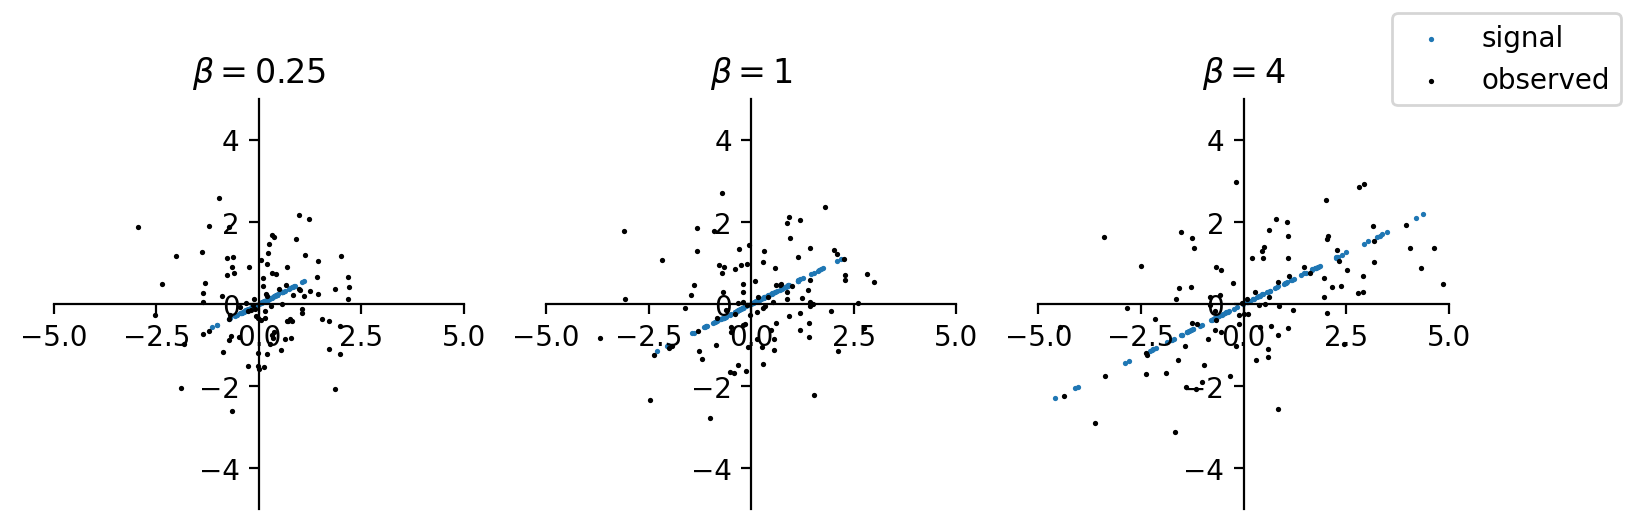

In [1]:
import numpy as np
import matplotlib.pyplot as plt

n, p = 100, 2
np.random.seed(1)
b1, b2, b3 = 1/4, 1, 4
u1 = u2 = u3 = np.array([1, 0.5]).reshape(1,2)
g0 = np.random.normal(size=(100,1))
g = np.random.normal(size=(100, 2))
signal1 = np.sqrt(b1) * g0 * u1
signal2 = np.sqrt(b2) * g0 * u2
signal3 = np.sqrt(b3) * g0 * u3
x1 = signal1 + g
x2 = signal2 + g
x3 = signal3 + g

fig, ax = plt.subplots(1,3, figsize=(9,3), dpi=200)
s = 0.8

ax[0].set_title(r'$\beta=0.25$')
ax[0].set(xlim=(-5, 5), ylim=(-5, 5))
ax[0].set_aspect('equal', 'box')
ax[0].scatter(signal1[:,0], signal1[:,1], s=s, c='C0', label='signal')
ax[0].scatter(x1[:,0], x1[:,1], s=s, c='k', label='observed')
ax[0].spines.left.set_position('center')
ax[0].spines.bottom.set_position('center')
ax[0].spines.right.set_color('none')
ax[0].spines.top.set_color('none')

ax[1].set_title(r'$\beta=1$')
ax[1].set(xlim=(-5, 5), ylim=(-5, 5))
ax[1].set_aspect('equal', 'box')
ax[1].scatter(signal2[:,0], signal2[:,1], s=s, c='C0')
ax[1].scatter(x2[:,0], x2[:,1], s=s, c='k')
ax[1].spines.left.set_position('center')
ax[1].spines.bottom.set_position('center')
ax[1].spines.right.set_color('none')
ax[1].spines.top.set_color('none')

ax[2].set_title(r'$\beta=4$')
ax[2].set(xlim=(-5, 5), ylim=(-5, 5))
ax[2].set_aspect('equal', 'box')
ax[2].scatter(signal3[:,0], signal3[:,1], s=s, c='C0')
ax[2].scatter(x3[:,0], x3[:,1], s=s, c='k')
ax[2].set_ylim
ax[2].spines.left.set_position('center')
ax[2].spines.bottom.set_position('center')
ax[2].spines.right.set_color('none')
ax[2].spines.top.set_color('none')

fig.legend()
plt.show()

We are interested in high-dimensional setting $n, p \rightarrow \infty$, under what conditions of $\beta$ and $\gamma$ can we detect $\boldsymbol{u}$ via PCA from the observed data $\boldsymbol{X}$. Let $\widehat{\boldsymbol{\Sigma}}_{n} = \frac{1}{n} \boldsymbol{X} ^{\top} \boldsymbol{X}$ and $(\hat{\lambda}, \hat{\boldsymbol{u}})$ be its top eigen pair, here detection means
- the top eigenvalue $\hat{\lambda}$ due to signal $\boldsymbol{u}$ is distinguishable from those due to noise $\boldsymbol{g}$
- the estimated signal direction $\hat{\boldsymbol{u}}$ is close to the true signal direction $\boldsymbol{u}$, measured by $\langle \hat{\boldsymbol{u}} , \boldsymbol{u} \rangle \ne 0$ w.h.p.

### Phase Transition

With random matrix theory, using the [Marchenko-pastur Distribution](marchenko-pastur-distribution), we have the following conclusions, as $n, p \rightarrow \infty$:

- The largest eigenvalue $\hat{\lambda}$ satisfies

  $$
  \lambda_{\max }\left(\widehat{\boldsymbol{\Sigma}}_{n}\right) \rightarrow\left\{\begin{array}{ll}
  (1+\sqrt{\gamma})^{2}=\gamma_{+}, & \beta \leq \sqrt{\gamma} \\
  \left(1+\beta\right)\left(1+\frac{\gamma}{\beta}\right) > \gamma_{+}, & \beta>\sqrt{\gamma}
  \end{array}\right.
  $$

  - if signal energy (or SNR) $\beta$ is smaller than $\sqrt{\gamma}$, the top eigenvalue of sample covariance matrix never 'pops up' from those of noise random matrix $\operatorname{Cov}\left( \boldsymbol{g}  \right)$, which follows M-P distribution in range $[\gamma_{-}, \gamma_{+}]$. That is, we don't know whether it is due to signal $\boldsymbol{u}$ or due to noise $\boldsymbol{g}$.
  - only if the signal energy $\beta$ is beyond the phase transition threshold $\sqrt{\gamma}$, the top eigenvalue can be separated from noise random matrix eigenvalues. However, even in the latter case it is a **biased** estimation of the top eigenvalue $(1 + \beta)$.

- The estimated signal direction $\hat{\boldsymbol{u} }$ satisfies

  $$
  \left|\left\langle \boldsymbol{u} , \hat{\boldsymbol{u} }\right\rangle\right|^{2} \rightarrow\left\{\begin{array}{ll}
  0 & \beta \leq \sqrt{\gamma} \\
  \frac{1-\gamma/\beta^2}{1+\gamma/\beta^2}  & \beta>\sqrt{\gamma}
  \end{array}\right.
  $$

  - if signal is of low energy $(\beta \le \sqrt{\gamma})$, the estimated top eigenvector is **orthogonal** to the true direction $\boldsymbol{u}$. PCA will tell us nothing about the true signal. In the extreme case $\beta = 0$, the largest eigenvector returned by PCA is just that from $\operatorname{Cov}\left( \boldsymbol{g}  \right) = \boldsymbol{I} _p$, which is purely a random direction.
  - if the signal is of high energy $(\beta \ge \sqrt{\gamma})$, PCA will return a **biased** estimation which lies over a lateral surface of a **cone** whose angle with the true signal is $\arccos \left( \sqrt{\frac{1-\gamma/\beta^2}{1+\gamma/\beta^2} } \right)$.


For derivation when $\beta > \sqrt{\gamma}$ case, see Yao's [notes](https://github.com/yao-lab/yao-lab.github.io/blob/master/book_datasci.pdf) (there are some typos). For the limiting distribution of $\lambda_{max}$, see [Johnstone](https://arxiv.org/pdf/math/0611589.pdf) p.16-17.

Key techniques in Yao's notes:
- Use 'whitening' $\boldsymbol{Z} = \boldsymbol{\Sigma} ^{-1/2} \boldsymbol{X} \sim \mathcal{N} (\boldsymbol{0} , \boldsymbol{I} _p)$ and then $\hat{\boldsymbol{\Sigma} }_{n}=\frac{1}{n} \boldsymbol{X} \boldsymbol{X} ^{T}=\boldsymbol{\Sigma} ^{1 / 2}\left(\frac{1}{n} \boldsymbol{Z} \boldsymbol{Z} ^{T}\right) \boldsymbol{\Sigma} ^{1 / 2}$ to relate the eigenvalue $\hat{\lambda}$ of $\hat{\boldsymbol{\Sigma} }_n$ with M-P distribution for eigenvalues of $\frac{1}{n} \boldsymbol{Z} \boldsymbol{Z} ^{T}$.
- Use integration to approximate infinite summation, if
  - The summation can be expressed as the expectation of some continuous random variable with known distribution function
  - The number of terms in the summation, denoted $p$, is large enough, $p \rightarrow \infty$
  - No term 'explode' to $\infty$. For instance, for the summation $\sum_{i=1}^p \frac{c}{\lambda - \lambda_j}$ where $\lambda_j \sim f_{MP}$ over $[\gamma_-, \gamma_+]$, if $\lambda \in [\gamma_-, \gamma_+]$, then as $p \rightarrow \infty$, some denominator $\lambda - \lambda_j$ will be infinitely small, and that term explode.

### Comparison to Davis-Kahan Theorem

Recall: $\boldsymbol{x}_i = g_{0,i} \boldsymbol{u} + \boldsymbol{g} _i$. If we use [Davis-Kahan theorem](davis-kahan), where
- truth: $\boldsymbol{M} = \beta \boldsymbol{u} \boldsymbol{u} ^{\top}$
- noise: $\boldsymbol{H} = \frac{1}{n} \sum_{i=1}^n  \boldsymbol{g}_i \boldsymbol{g}_i ^{\top}$
- observed:

  $$\begin{aligned}
  \widehat{\boldsymbol{M}}
  &=\widehat{\boldsymbol{\Sigma}} _n \\
  &= \frac{1}{n} \sum_{i=1}^n \boldsymbol{x}_i \boldsymbol{x}_i ^{\top} \\
  &= \beta \boldsymbol{u} \boldsymbol{u} ^{\top} + \boldsymbol{u}  \left(  \frac{1}{n} \sum g_{0, i} \boldsymbol{g}_i ^{\top}  \right)+  \left( \frac{1}{n} \sum g_{0, i}  \boldsymbol{g}_i \right) \boldsymbol{u}  ^{\top} + \frac{1}{n} \sum \boldsymbol{g}_i \boldsymbol{g}_i ^{\top}   \\
  &\overset{n,p\rightarrow \infty}{=} \beta \boldsymbol{u} \boldsymbol{u} ^{\top} + \frac{1}{n} \sum \boldsymbol{g}_i \boldsymbol{g}_i ^{\top}\\
  &= \boldsymbol{M} + \boldsymbol{H}   \\
  \end{aligned}$$

  Note that the cross-product term converges to $\boldsymbol{0}$ since $g_{0,i} \perp \boldsymbol{g}_i$,  while the last term does not converge to $\boldsymbol{I} _p$ since $p/n \rightarrow \gamma$, i.e. no enough samples for big (and growing) dimensions.

The distance between the first eigenvector $\hat{\boldsymbol{u}}$ of $\widehat{\boldsymbol{M}}$ and $\boldsymbol{u}$ of the truth $\boldsymbol{M}$ is

$$
\operatorname{dist}(\hat{\boldsymbol{u}}, \boldsymbol{u})=\left\|\hat{\boldsymbol{u}} \hat{\boldsymbol{u}}^{\top}-\boldsymbol{u} \boldsymbol{u}^{\top}\right\|_{2} \leq \frac{\|\boldsymbol{H}\|}{\lambda_1(\boldsymbol{M}) - \lambda_2(\boldsymbol{M} )-\|\boldsymbol{H} \|} = \frac{\gamma_{+}}{\lambda_1 - \lambda_2 - \gamma_{+}}
$$

where the spectral norm $\|\boldsymbol{H}\| = \gamma_{+}$ since the eigenvalues of $\boldsymbol{H}$ follows [Marchenko-Pastur Distribution](marchenko-pastur-distribution) where the upper bound is $\gamma_{+}$.

If we want $|\langle \boldsymbol{u} ,  \hat{\boldsymbol{u}}\rangle| ^2 > c$, then it is equivalent to $\left\|\hat{\boldsymbol{u}} \hat{\boldsymbol{u}}^{\top}-\boldsymbol{u} \boldsymbol{u}^{\top}\right\|_{2}^2 < 1-c$ since they [sum up to](norm) 1. That is, the denominator has some lower bound, i.e. $\lambda_1 - \lambda_2 - \gamma_{+}>  b$. In the spike model, $\lambda_1 - \lambda_2 = \beta - 0 = \beta$. Hence, the condition for $\beta$ is

$$
\beta > (1 + \sqrt{\gamma})^2 + b
$$

This condition is stronger than the above result: $\beta > \sqrt{\gamma}$ is ok.